# San Francisco Police Department Crime Rate Reports

For this project we will be analyzing Sa Francisco Police Department Crime Rate reports from [Kaggle](https://www.kaggle.com/psmavi104/san-francisco-crime-data). The data contains the 

* Incident_Datetime
* Incident_Time
* Incident_Year
* Incident_Day_of_Week
* Report_Datetime
* Incident_ID
* Row_ID
* Incident_Number
* CAD_Number
* Report_Type_Code
* Report_Type_Description
* Filed_Online
* Incident_Code
* Incident_Category
* Incident_Subcategory
* Incident_Description
* Resolution
* Intersection
* CNN
* Police_District
* Analysis_Neighborhood
* Supervisor_District
* Latitude 
* Longitude
* point
* SF_Find_Neighborhoods
* Current_Police_Districts
* Current_Supervisor_Districts
* Analysis_Neighborhoods
* HSOC_Zones_as_of_2018-06-05
* OWED_Public_Spaces
* Central_Market/Tenderloin_Boundary_Polygon_-_Updated
* Parks_Alliance_CPSI_27+TL_sites


## Data and Setup

** Import some libraries **

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import warnings
from wordcloud import WordCloud

%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

** Read in the csv file as a dataframe called df **

In [3]:
df  = pd.read_csv('SFCD_2018.csv')

## Exploring Data

In [4]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
df.columns

Index(['Incident_Datetime', 'Incident_Date', 'Incident_Time', 'Incident_Year',
       'Incident_Day_of_Week', 'Report_Datetime', 'Row_ID', 'Incident_ID',
       'Incident_Number', 'CAD_Number', 'Report_Type_Code',
       'Report_Type_Description', 'Filed_Online', 'Incident_Code',
       'Incident_Category', 'Incident_Subcategory', 'Incident_Description',
       'Resolution', 'Intersection', 'CNN', 'Police_District',
       'Analysis_Neighborhood', 'Supervisor_District', 'Latitude', 'Longitude',
       'point', 'SF_Find_Neighborhoods', 'Current_Police_Districts',
       'Current_Supervisor_Districts', 'Analysis_Neighborhoods',
       'HSOC_Zones_as_of_2018-06-05', 'OWED_Public_Spaces',
       'Central_Market/Tenderloin_Boundary_Polygon_-_Updated',
       'Parks_Alliance_CPSI_27+TL_sites'],
      dtype='object')

In [6]:
# plt.rcParams['figure.figsize'] = (10, 8)
# plt.style.use('bmh')
# wc = WordCloud(background_color = 'pink', width = 1500, height = 1500).generate(str(df['Incident_Description']))
# plt.imshow(wc)
# plt.axis('off')
# plt.show()

In [7]:
df.isnull().sum()

Incident_Datetime                                            0
Incident_Date                                                0
Incident_Time                                                0
Incident_Year                                                0
Incident_Day_of_Week                                         0
Report_Datetime                                              0
Row_ID                                                       0
Incident_ID                                                  0
Incident_Number                                              0
CAD_Number                                               50964
Report_Type_Code                                             0
Report_Type_Description                                      0
Filed_Online                                            176347
Incident_Code                                                0
Incident_Category                                           19
Incident_Subcategory                                   

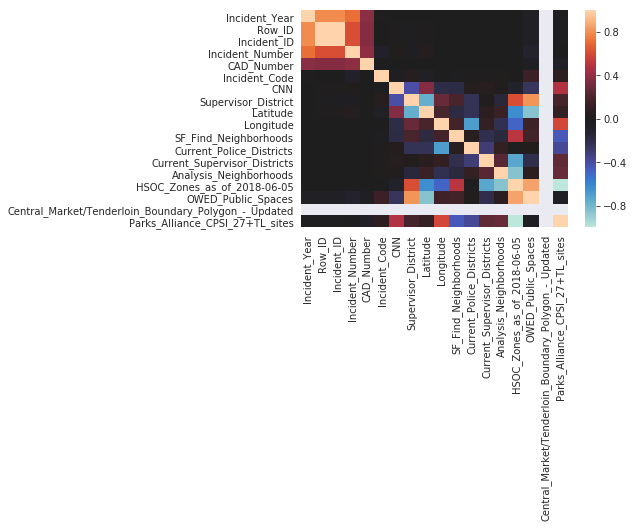

In [8]:
sns.heatmap(df.corr(),center =0)

In [9]:
df_2 = df.drop(['CAD_Number', 'Report_Type_Code', 'Filed_Online', 'Incident_Code',
       'Incident_Category', 'Incident_Subcategory', 'Intersection', 'CNN', 'Police_District',
       'Analysis_Neighborhood', 'Supervisor_District',
       'point', 'SF_Find_Neighborhoods', 'Current_Police_Districts',
       'Current_Supervisor_Districts', 'Analysis_Neighborhoods',
       'HSOC_Zones_as_of_2018-06-05', 'OWED_Public_Spaces',
       'Central_Market/Tenderloin_Boundary_Polygon_-_Updated'], axis = 1)

In [10]:
df_2.head()

,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,Report_Type_Description,Incident_Description,Resolution,Latitude,Longitude,Parks_Alliance_CPSI_27+TL_sites
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,Initial,Suspicious Occurrence,Unfounded,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,Coplogic Initial,Lost Property,Open or Active,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,Initial,Found Property,Open or Active,37.782685,-122.422464,NaN
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,Coplogic Initial,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,Initial Supplement,Found Property,Open or Active,37.779091,-122.464145,NaN


In [11]:
df_2.dropna(how='all') 

,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,Report_Type_Description,Incident_Description,Resolution,Latitude,Longitude,Parks_Alliance_CPSI_27+TL_sites
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,Initial,Suspicious Occurrence,Unfounded,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,Coplogic Initial,Lost Property,Open or Active,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,Initial,Found Property,Open or Active,37.782685,-122.422464,NaN
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,Coplogic Initial,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,Initial Supplement,Found Property,Open or Active,37.779091,-122.464145,NaN
5,2019/06/10 06:57:00 PM,2019/06/10,18:57,2019,Monday,2019/06/10 06:57:00 PM,81021904134,810219,190417987,Initial,Battery,Cite or Arrest Adult,37.784449,-122.416072,NaN
6,2019/04/18 01:42:00 PM,2019/04/18,13:42,2019,Thursday,2019/04/18 01:58:00 PM,79186007045,791860,190256832,Vehicle Supplement,"Vehicle, Recovered, Truck",Open or Active,NaN,NaN,NaN
7,2019/06/10 01:30:00 AM,2019/06/10,01:30,2019,Monday,2019/06/10 02:53:00 AM,80997904134,809979,190416070,Initial,Battery,Open or Active,37.723168,-122.442554,NaN
8,2019/06/09 11:08:00 PM,2019/06/09,23:08,2019,Sunday,2019/06/10 09:28:00 PM,81026328150,810263,190418264,Initial,"Malicious Mischief, Vandalism to Property",Open or Active,37.792487,-122.405654,NaN
9,2019/06/03 01:15:00 PM,2019/06/03,13:15,2019,Monday,2019/06/05 05:43:00 PM,81004006374,810040,190398365,Coplogic Supplement,"Theft, Other Property, >$950",Open or Active,37.770964,-122.431904,NaN


In [12]:
df_2.shape

(223958, 15)

In [13]:
#df.Incident_Description.value_counts().plot.bar()

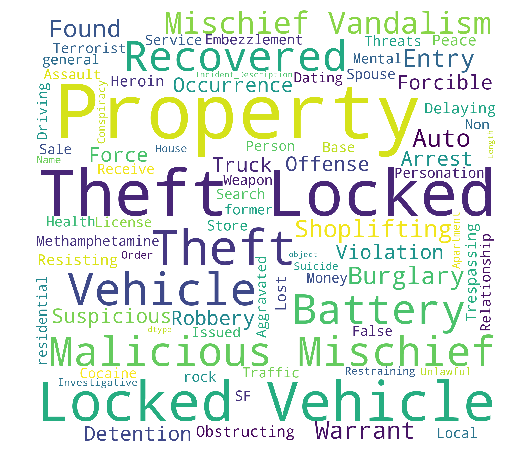

In [14]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('bmh')
wc = WordCloud(background_color = 'white', width = 1800, height = 1700).generate(str(df_2['Incident_Description']))
plt.imshow(wc)
plt.axis('off')
plt.show()

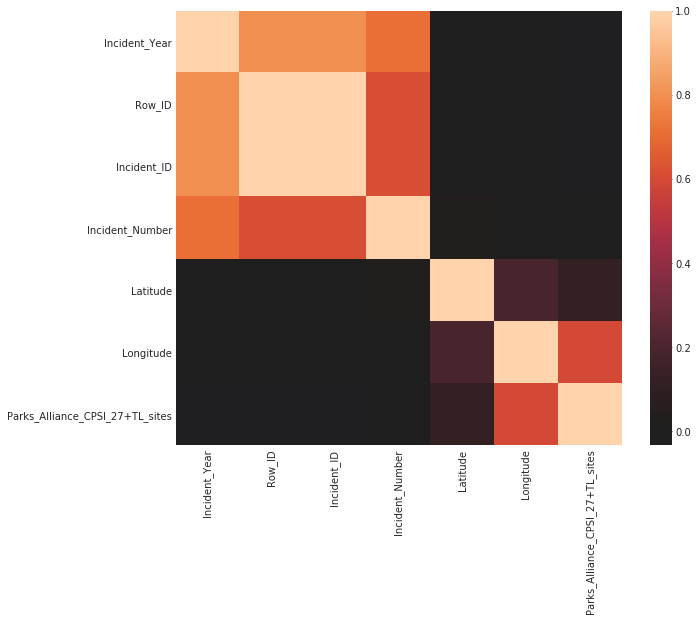

In [15]:
sns.heatmap(df_2.corr(),center =0)

In [16]:
df_2['Incident_Datetime'] = pd.to_datetime(df_2['Incident_Datetime'])

In [17]:
df_2.columns

Index(['Incident_Datetime', 'Incident_Date', 'Incident_Time', 'Incident_Year',
       'Incident_Day_of_Week', 'Report_Datetime', 'Row_ID', 'Incident_ID',
       'Incident_Number', 'Report_Type_Description', 'Incident_Description',
       'Resolution', 'Latitude', 'Longitude',
       'Parks_Alliance_CPSI_27+TL_sites'],
      dtype='object')

In [18]:
df_2['date'] = df_2['Incident_Datetime'].apply(lambda t: t.date())

In [19]:
df_2['month'] = df_2['Incident_Datetime'].apply(lambda time: time.month)

In [20]:
df_2['hour'] = df_2['Incident_Datetime'].apply(lambda time: time.hour)

In [21]:
df_2['day'] = df_2['Incident_Datetime'].apply(lambda time: time.hour)

In [22]:
df_2.drop(['Incident_Date', 'Incident_Time', 'Incident_Year','Row_ID', 'Incident_ID', 'Report_Type_Description', 'Parks_Alliance_CPSI_27+TL_sites','Incident_Number', 'Report_Datetime','Incident_Datetime'], axis  = 1, inplace=True)



In [23]:
df_2.dropna(axis=0, inplace=True)

In [24]:
df_2.head()

,Incident_Day_of_Week,Incident_Description,Resolution,Latitude,Longitude,date,month,hour,day
2,Wednesday,Found Property,Open or Active,37.782685,-122.422464,2019-06-05,6,14,14
4,Monday,Found Property,Open or Active,37.779091,-122.464145,2019-06-10,6,11,11
5,Monday,Battery,Cite or Arrest Adult,37.784449,-122.416072,2019-06-10,6,18,18
7,Monday,Battery,Open or Active,37.723168,-122.442554,2019-06-10,6,1,1
8,Sunday,"Malicious Mischief, Vandalism to Property",Open or Active,37.792487,-122.405654,2019-06-09,6,23,23


## Basic Questions

** What are the top 20 crimes in San Francisco? **

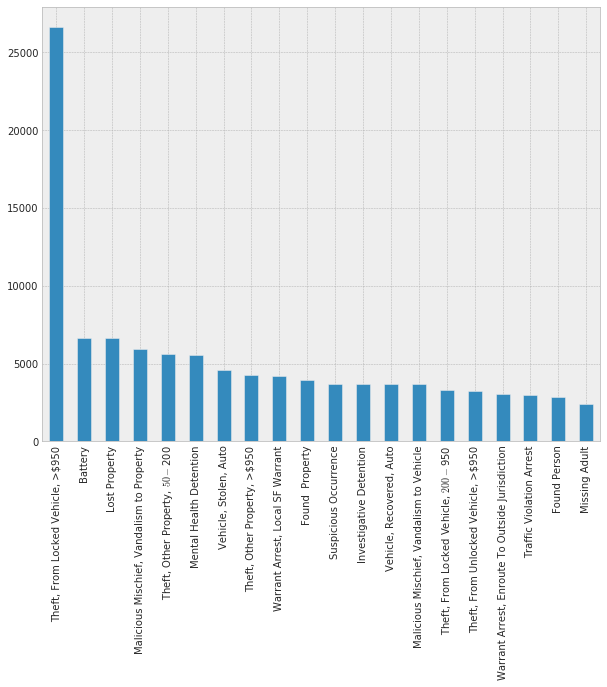

In [25]:
df_2.Incident_Description.value_counts().head(20).plot(kind='bar')

In [26]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1600x480 with 0 Axes>

<Figure size 1600x480 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

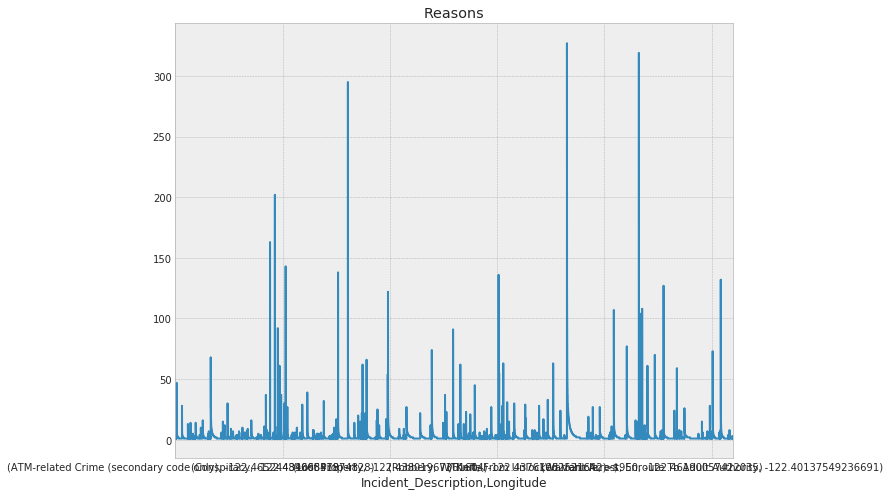

<Figure size 1440x432 with 0 Axes>

In [27]:
df_2.groupby('Incident_Description')['Longitude'].value_counts().plot()
plt.title('Reasons')
plt.figure(figsize=(20, 6))
#plt.tight_layout()

In [28]:
#sns.countplot(x='month',data=byMonth,hue='Incident_Description',palette='viridis')

In [29]:
byMonth = df_2.groupby('Incident_Day_of_Week').count()

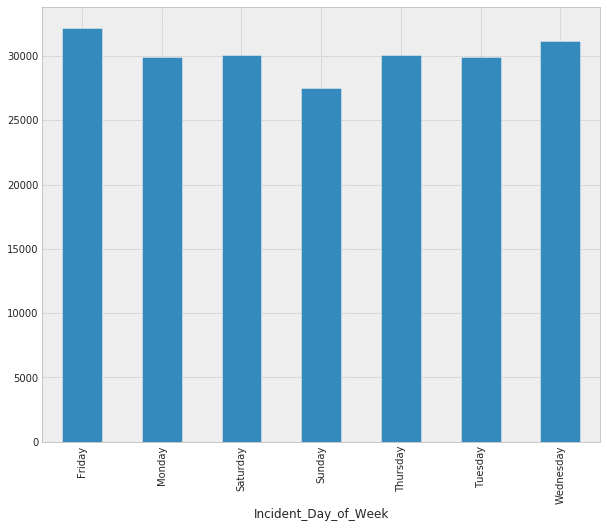

In [30]:
byMonth['Incident_Description'].plot(kind='bar')

In [31]:
df_2.head()

,Incident_Day_of_Week,Incident_Description,Resolution,Latitude,Longitude,date,month,hour,day
2,Wednesday,Found Property,Open or Active,37.782685,-122.422464,2019-06-05,6,14,14
4,Monday,Found Property,Open or Active,37.779091,-122.464145,2019-06-10,6,11,11
5,Monday,Battery,Cite or Arrest Adult,37.784449,-122.416072,2019-06-10,6,18,18
7,Monday,Battery,Open or Active,37.723168,-122.442554,2019-06-10,6,1,1
8,Sunday,"Malicious Mischief, Vandalism to Property",Open or Active,37.792487,-122.405654,2019-06-09,6,23,23


In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210930 entries, 2 to 223957
Data columns (total 9 columns):
Incident_Day_of_Week    210930 non-null object
Incident_Description    210930 non-null object
Resolution              210930 non-null object
Latitude                210930 non-null float64
Longitude               210930 non-null float64
date                    210930 non-null object
month                   210930 non-null int64
hour                    210930 non-null int64
day                     210930 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 16.1+ MB


In [33]:
df_2.Resolution.value_counts(normalize = True)

Open or Active             0.741298
Cite or Arrest Adult       0.240525
Unfounded                  0.007813
Cite or Arrest Juvenile    0.007296
Exceptional Adult          0.002736
Exceptional Juvenile       0.000332
Name: Resolution, dtype: float64

In [34]:
crimes=list(df_2.Incident_Description.values)
key_crimes = []
for x in crimes:
    crime = x.split()
    for c in crime:
        key_crimes.append(c.strip(','))
    

In [35]:
crimes_df = pd.DataFrame(key_crimes)

In [36]:
crimes_df[0].value_counts(normalize = True).head(75)

Theft            0.072268
Vehicle          0.064095
From             0.050250
>$950            0.045668
Locked           0.037660
Property         0.037533
Other            0.019215
or               0.019051
Warrant          0.015250
to               0.013746
Mischief         0.013715
Malicious        0.013715
Burglary         0.013199
Arrest           0.013010
Stolen           0.012269
Entry            0.011439
Vandalism        0.011421
Detention        0.010911
W/               0.010785
$50-$200         0.010644
$200-$950        0.010387
Auto             0.009790
Battery          0.009611
of               0.009222
Lost             0.008537
Possession       0.008305
Found            0.008136
Recovered        0.007571
Violation        0.007478
Person           0.007114
                   ...   
Unlocked         0.004733
Driving          0.004701
Fraudulent       0.004573
Enroute          0.004502
Adult            0.004487
Occurrence       0.004447
Investigative    0.004338
Weapon      

In [37]:
key_cr = ['Larceny','Theft', 'Assault', 'Vandalism', 'Burglary',
          'Battery','Rape','Possession', 'Robbery','Fraudulent','Mental','Violation','Person',
         'Suspicious','Shoplifting','Traffic','Vehicle']

In [38]:
def assign_crime(x):
    cr = 'general'
    for crime in key_cr:
        if crime in x:
            cr = crime
    return cr
df_2['Crime'] = df_2.Incident_Description.apply(assign_crime)
    

In [39]:
df_3 = df_2[df_2.Crime != 'general']
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147026 entries, 5 to 223957
Data columns (total 10 columns):
Incident_Day_of_Week    147026 non-null object
Incident_Description    147026 non-null object
Resolution              147026 non-null object
Latitude                147026 non-null float64
Longitude               147026 non-null float64
date                    147026 non-null object
month                   147026 non-null int64
hour                    147026 non-null int64
day                     147026 non-null int64
Crime                   147026 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 12.3+ MB


In [40]:
crimes_pd = pd.concat([df_3,pd.get_dummies(df_3.Crime)],axis = 1)
crimes_pd = pd.concat([crimes_pd,pd.get_dummies(crimes_pd.Incident_Day_of_Week)],axis = 1)
crimes_pd = pd.concat([crimes_pd,pd.get_dummies(crimes_pd.hour)],axis = 1)
crimes_pd = pd.concat([crimes_pd,pd.get_dummies(crimes_pd.day)],axis = 1)
crimes_pd = pd.concat([crimes_pd,pd.get_dummies(crimes_pd.month)],axis = 1)

In [41]:
crimes_pd.drop(['Incident_Description','date','Incident_Day_of_Week','Crime'], axis = 1, inplace = True)

In [42]:
crimes_pd.reset_index(drop=True)

,Resolution,Latitude,Longitude,month,hour,day,Assault,Battery,Burglary,Fraudulent,...,3,4,5,6,7,8,9,10,11,12
0,Cite or Arrest Adult,37.784449,-122.416072,6,18,18,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Open or Active,37.723168,-122.442554,6,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Open or Active,37.792487,-122.405654,6,23,23,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Open or Active,37.770964,-122.431904,6,13,13,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Open or Active,37.765323,-122.443538,6,2,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Open or Active,37.781677,-122.492375,6,19,19,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,Open or Active,37.789529,-122.413728,6,17,17,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,Open or Active,37.727115,-122.405586,6,11,11,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,Exceptional Adult,37.770470,-122.443312,5,20,20,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,Open or Active,37.785373,-122.431366,6,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


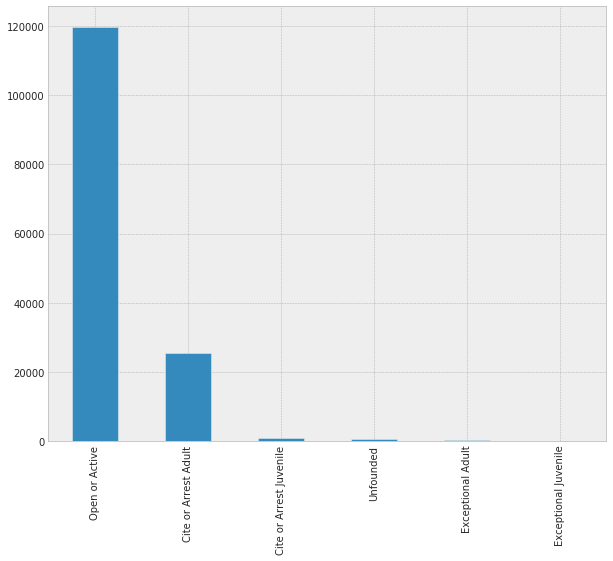

In [43]:
crimes_pd.Resolution.value_counts().plot(kind = 'bar')
plt.savefig('figures/Resolutions.png')

In [44]:
X = crimes_pd.drop(['Resolution','day','hour','month'], axis = 1)
y = crimes_pd.Resolution
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 212)

In [45]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [134]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(44108, 28)
(102918, 28)
(44108,)
(102918,)


In [46]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0)

In [47]:
res1 = clf.fit(X_train,y_train)

In [48]:
y_hat = clf.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_hat)

0.8849641788337717

In [50]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
visualizer = ROCAUC(clf)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()   

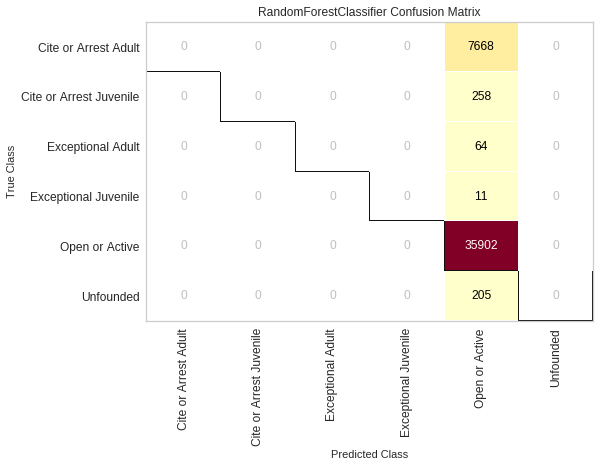

In [362]:
cm = ConfusionMatrix(clf)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
plt.savefig('figures/CM0.png')
cm.poof()

In [155]:
y_test.value_counts(normalize=True)

Open or Active             0.813957
Cite or Arrest Adult       0.173846
Cite or Arrest Juvenile    0.005849
Unfounded                  0.004648
Exceptional Adult          0.001451
Exceptional Juvenile       0.000249
Name: Resolution, dtype: float64

In [344]:
clf_RF_weights = RandomForestClassifier(n_jobs=-1,class_weight={'Open or Active':0.81,
                                                      'Cite or Arrest Adult':0.17,
                                                     'Cite or Arrest Juvenile': .006,
                                                     "Unfounded":0.004648,
                                                     "Exceptional Adult":0.001451,
                                                    "Exceptional Juvenile":0.000249},
                                        max_depth = 1000, random_state = 24,n_estimators=1000)

In [ ]:
clf_RF_weights.fit(X_train,y_train)

In [ ]:
y_hat = clf_RF_weights.predict(X_test)

acc = accuracy_score(y_test, y_hat) * 100
print(f"Accuracy Score is {acc}")

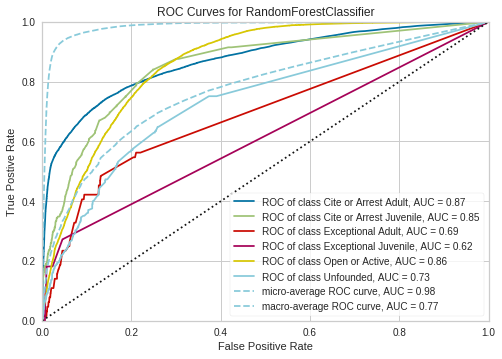

In [192]:
visualizer = ROCAUC(clf_RF_weights)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof()  

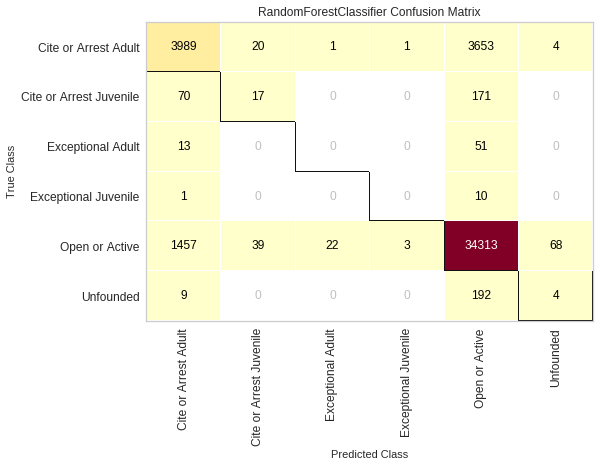

In [347]:
cm = ConfusionMatrix(clf_RF_weights)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
plt.savefig('figures/CM_Weights.png')
cm.poof()

In [201]:
crimes_pd.head(10)

,Resolution,Latitude,Longitude,month,hour,day,Assault,Battery,Burglary,Fraudulent,...,Vandalism,Vehicle,Violation,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
5,Cite or Arrest Adult,37.784449,-122.416072,6,18,18,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,Open or Active,37.723168,-122.442554,6,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,Open or Active,37.792487,-122.405654,6,23,23,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9,Open or Active,37.770964,-122.431904,6,13,13,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,Open or Active,37.765323,-122.443538,6,2,2,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11,Open or Active,37.781677,-122.492375,6,19,19,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
12,Open or Active,37.789529,-122.413728,6,17,17,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
13,Open or Active,37.727115,-122.405586,6,11,11,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,Exceptional Adult,37.770470,-122.443312,5,20,20,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15,Open or Active,37.785373,-122.431366,6,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [270]:
crimes_pd.to_csv("data/crime_data.csv", index=False)

In [326]:
import numpy as np
from sklearn.model_selection import KFold

X = crimes_pd.drop('Resolution', axis = 1)
y = crimes_pd.Resolution




In [216]:
def K_Fold_Classification(X,y,folds):
    kf = KFold(n_splits=n)
    kf.get_n_splits(X)
    train_acc= []
    test_acc = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf_RF_weights.fit(X_train,y_train)
        y_hat = clf_RF_weights.predict(X_test)
        y_hat_train = clf_RF_weights.predict(X_train)
        acc = accuracy_score(y_test, y_hat) * 100
        acc_train = accuracy_score(y_train, y_hat_train) * 100
        train_acc.append(acc_train)
        test_acc.append(acc)
    return train_score,test_score


In [204]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [205]:
y_pred = svclassifier.predict(X_test)

In [206]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(f"The accuracy score is {accuracy_score(y_test, y_pred)}")

[[ 1166     0     0     0  1448     0]
 [   18     0     0     0    61     0]
 [    3     0     0     0    39     0]
 [    0     0     0     0     1     0]
 [  162     0     0     0 11740     0]
 [    2     0     0     0    62     0]]
                         precision    recall  f1-score   support

   Cite or Arrest Adult       0.86      0.45      0.59      2614
Cite or Arrest Juvenile       0.00      0.00      0.00        79
      Exceptional Adult       0.00      0.00      0.00        42
   Exceptional Juvenile       0.00      0.00      0.00         1
         Open or Active       0.88      0.99      0.93     11902
              Unfounded       0.00      0.00      0.00        64

              micro avg       0.88      0.88      0.88     14702
              macro avg       0.29      0.24      0.25     14702
           weighted avg       0.87      0.88      0.86     14702

The accuracy score is 0.8778397496939192


In [234]:
clf_GS = RandomForestClassifier(
    n_jobs=-1,
    class_weight={'Open or Active':0.81,
                  'Cite or Arrest Adult':0.17,
                  'Cite or Arrest Juvenile':0.006,
                  "Unfounded":0.004648,
                  "Exceptional Adult":0.001451,
                  "Exceptional Juvenile":0.000249},
    random_state = 24,'criterion': 'gini',
    'max_depth': 20,
    'max_features': 'auto',
    'n_estimators': 1000)

In [235]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [20,50,100,200],
    'criterion' :['gini', 'entropy']
}

In [240]:
# CV_rfc = GridSearchCV(estimator=clf_GS, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True,
            class_weight={'Open or Active': 0.81, 'Cite or Arrest Adult': 0.17, 'Cite or Arrest Juvenile': 0.006, 'Unfounded': 0.004648, 'Exceptional Adult': 0.001451, 'Exceptional Juvenile': 0.000249},
            criterion='gini', max_depth=None, ma...mators='warn', n_jobs=-1, oob_score=False,
            random_state=24, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 20], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [327]:
#pd.to_pickle(CV_rfc, "model/GridSeach_RF.pkl")

In [241]:
CV_rfc.best_score_

0.8856292131434963

In [243]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 1000}

In [251]:
clf_RF_weights = RandomForestClassifier(
    n_jobs=-1,
    class_weight={'Open or Active':0.81,
                  'Cite or Arrest Adult':0.17,
                  'Cite or Arrest Juvenile':0.006,
                  "Unfounded":0.004648,
                  "Exceptional Adult":0.001451,
                  "Exceptional Juvenile":0.000249},
    random_state = 24,
    criterion= 'gini',
    max_depth= 20,
    max_features='auto',
    n_estimators= 1000)

In [252]:
train, test = K_Fold_Classification(X,y,10)

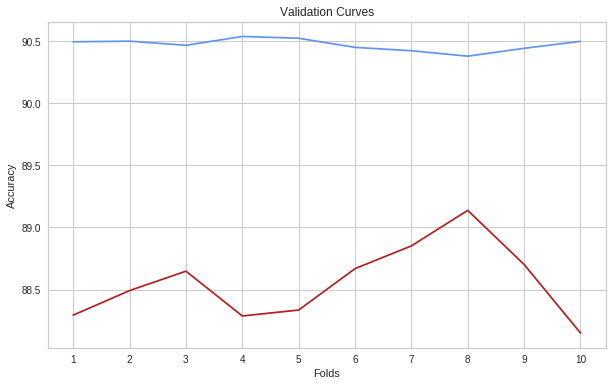

In [258]:
xs = list(range(1, 11))
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.
axes = figure.add_subplot(1, 1, 1)

axes.plot(xs, test, color="firebrick")
axes.plot(xs, train, color="cornflowerblue")

axes.set_xticks(xs)
axes.set_xticklabels([str(x) for x in xs])

axes.set_title("Validation Curves")
axes.set_xlabel("Folds")
axes.set_ylabel("Accuracy")


plt.savefig("figures/Validation_Curve.png")
plt.show()

plt.close()

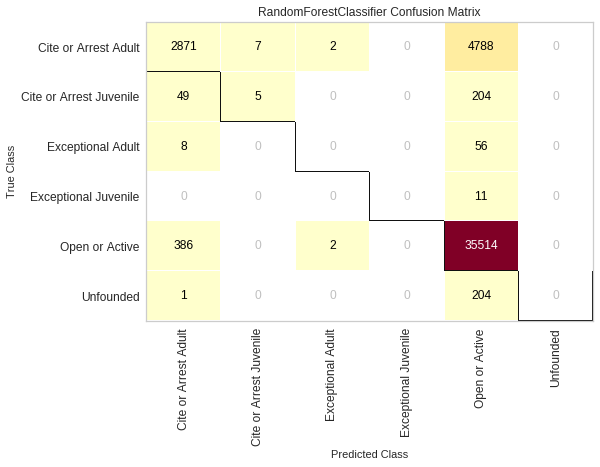

In [325]:
cm = ConfusionMatrix(clf_RF_weights)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
plt.savefig('figures/CM.png')
cm.poof()

In [318]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)

In [321]:
X_pca_train, X__pca_test, y_pca_train, y_pca_test = train_test_split(X_pca,y,test_size = .3, random_state = 212)

In [322]:
clf_RF_weights.fit(X_pca_train,y_pca_train)
y_pca_hat = clf_RF_weights.predict(X_pca_test)
acc = accuracy_score(y_pca_test,y_hat)
print(acc)

0.8703636528520903


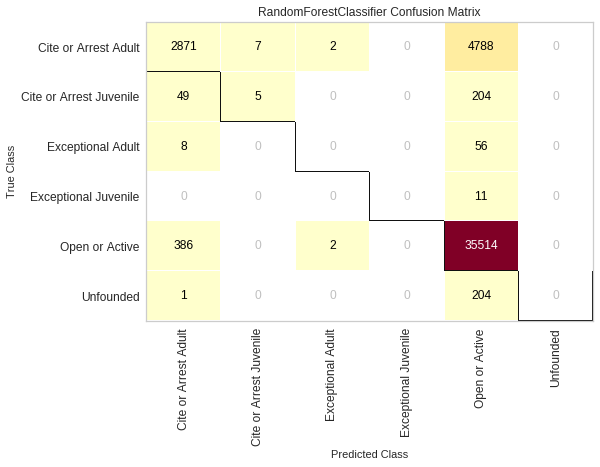

In [324]:
cm = ConfusionMatrix(clf_RF_weights)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
plt.savefig('figures/CM2.png')
cm.poof()